In [39]:
import acquire
import prepare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as met
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [40]:
df = acquire.get_telco_data()

In [41]:
df = prepare.prep_telco(df)

In [42]:
acquire.col_range(df)

,count,mean,std,min,25%,50%,75%,max,range
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00,2.0
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00,3.0
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00,2.0
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00,1.0
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00,71.0
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75,100.5
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80,8666.0
gender_encoded,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00,1.0
partner_encoded,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00,1.0
dependents_encoded,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00,1.0


In [43]:
num, cat = acquire.dtypes_to_list(df)

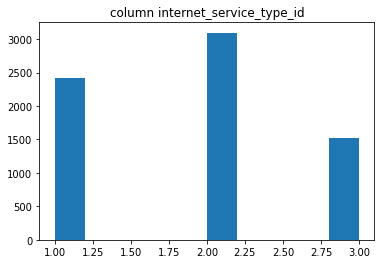

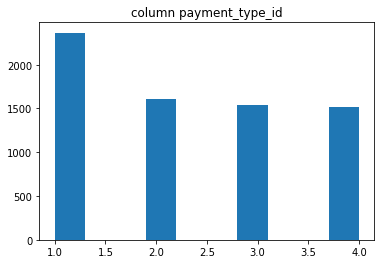

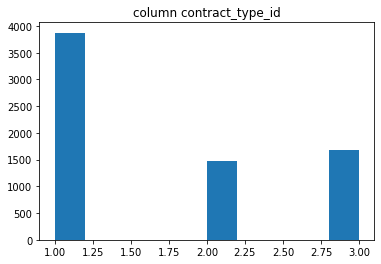

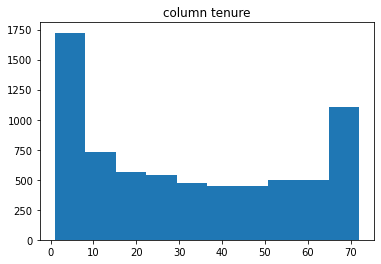

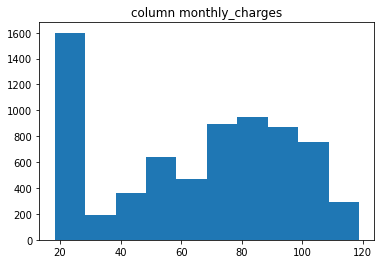

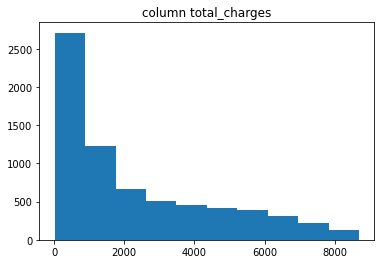

In [44]:
prepare.num_dist(df)

In [45]:
train, validate,test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_X_y(df, 'churn')

In [46]:
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3727,3,2,3,0,45,20.35,929.20,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4271,3,2,1,0,34,20.65,716.40,1,1,1,...,0,1,0,0,0,0,1,0,0,1
6317,3,4,1,0,15,19.45,340.85,0,1,0,...,0,1,0,0,0,0,1,1,0,0
489,1,2,1,0,12,61.65,713.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3771,1,3,1,0,7,62.80,418.30,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
train.shape, validate.shape, test.shape

((4218, 34), (1407, 34), (1407, 34))

In [48]:
print(y_train[:5])
X_train.head()

3727    0
4271    0
6317    0
489     1
3771    0
Name: churn, dtype: int64


,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3727,3,2,3,0,45,20.35,929.20,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4271,3,2,1,0,34,20.65,716.40,1,1,1,...,0,1,0,0,0,0,1,0,0,1
6317,3,4,1,0,15,19.45,340.85,0,1,0,...,0,1,0,0,0,0,1,1,0,0
489,1,2,1,0,12,61.65,713.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3771,1,3,1,0,7,62.80,418.30,1,0,0,...,0,0,1,0,0,0,0,0,0,0


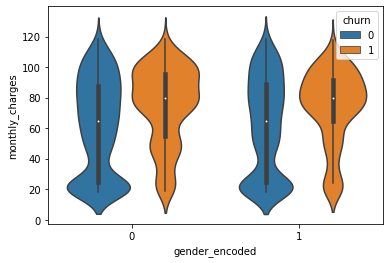

In [49]:
sns.violinplot(x='gender_encoded',y='monthly_charges', data=train, hue = 'churn')
plt.show()

In [50]:
acquire.col_range(train)

,count,mean,std,min,25%,50%,75%,max,range
internet_service_type_id,4218.0,1.879090,0.739857,1.00,1.0000,2.000,2.000,3.00,2.00
payment_type_id,4218.0,2.339260,1.154377,1.00,1.0000,2.000,3.000,4.00,3.00
contract_type_id,4218.0,1.688715,0.835012,1.00,1.0000,1.000,2.000,3.00,2.00
senior_citizen,4218.0,0.160028,0.366676,0.00,0.0000,0.000,0.000,1.00,1.00
tenure,4218.0,32.609056,24.696663,1.00,8.2500,30.000,56.000,72.00,71.00
monthly_charges,4218.0,64.758250,30.282198,18.25,34.7000,70.200,90.250,118.65,100.40
total_charges,4218.0,2298.477584,2276.065927,18.85,392.6625,1406.325,3861.425,8594.40,8575.55
gender_encoded,4218.0,0.499526,0.500059,0.00,0.0000,0.000,1.000,1.00,1.00
partner_encoded,4218.0,0.482456,0.499751,0.00,0.0000,0.000,1.000,1.00,1.00
dependents_encoded,4218.0,0.301091,0.458786,0.00,0.0000,0.000,1.000,1.00,1.00


In [51]:
# Wah this is the best, it can filter your new column, so now I can get a visual count of number of seniors who churned.
train['senior_churn'] = 0
train.loc[train['senior_citizen'] == 1, 'senior_churn'] = 1
train.loc[train['churn'] == 0, 'senior_churn'] = 0
train.senior_churn.value_counts(), train.senior_citizen.value_counts()

(0    3929
 1     289
 Name: senior_churn, dtype: int64,
 0    3543
 1     675
 Name: senior_citizen, dtype: int64)

In [52]:
pd.crosstab(train.senior_citizen,train.senior_churn)

senior_churn,0,1
senior_citizen,,
0,3543,0
1,386,289


In [53]:
pd.crosstab(train.senior_citizen,train.senior_churn)[1:2]

senior_churn,0,1
senior_citizen,,
1,386,289


In [54]:
senior = train.senior_citizen[train.senior_citizen == 1].count()

In [55]:
senior

675

In [56]:
def plot_stack(column_1, column_2):
 plot_stck=pd.crosstab(index=column_1, columns=column_2)
 plot_stck.plot(kind='bar', figsize=(8,8), stacked=True)
 return
 plot_stack(train_data_wmis['max_glu_serum'], train_data_wmis['readmitted'])

------

Starting MVP, modelling.

In [57]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [58]:
clf = clf.fit(X_train, y_train)

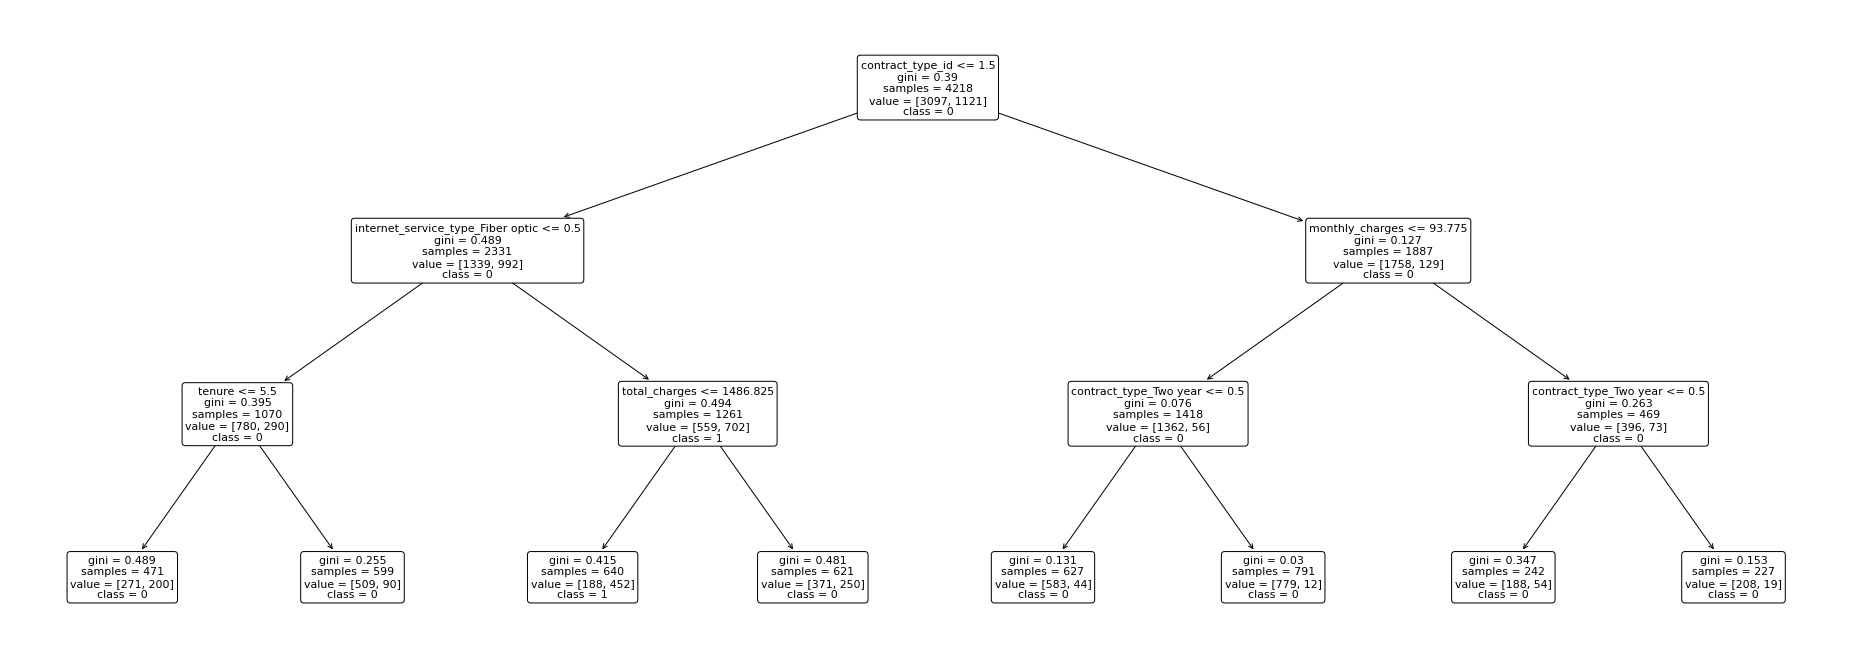

In [59]:
plt.figure(figsize=(33,12))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)
plt.show()

In [60]:
y_pred = clf.predict(X_train)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [61]:
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob[:5]

array([[0.98482933, 0.01517067],
       [0.84974958, 0.15025042],
       [0.84974958, 0.15025042],
       [0.84974958, 0.15025042],
       [0.84974958, 0.15025042]])

In [62]:
pd.crosstab(y_train,y_pred)
TP = 452
TN = 2909
FP = 188
FN = 669

In [63]:
print(f" The Accuracy of 'Tree 1' is ~{round(clf.score(X_train, y_train), 2)}")

 The Accuracy of 'Tree 1' is ~0.8


In [64]:
report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.813024,0.706250,0.796823,0.759637,0.784647
recall,0.939296,0.403211,0.796823,0.671254,0.796823
f1-score,0.871610,0.513345,0.796823,0.692478,0.776396
support,3097.000000,1121.000000,0.796823,4218.000000,4218.000000


In [65]:
print(f'accuracy: {met.accuracy_score(train.churn, clf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn, clf.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn, clf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn, clf.predict(X_train)):.2%}')
print(f'support: {clf.predict(X_train).sum()}')

accuracy: 79.68%
true positive rate / recall: 40.32%
true negative rate / Specificity: 93.93%
false potivie rate / Percision: 70.62%
false negative rate: 81.30%
f1-score: 51.33%
support: 640


-----

Random Forest 1

In [66]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=3, random_state=123)

In [67]:
rf = rf.fit(X_train, y_train)

In [70]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [72]:
print(f" The Accuracy of 'Random Forest 1' is ~{round(rf.score(X_train, y_train), 2)}")

 The Accuracy of 'Random Forest 1' is ~0.78
